In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [2]:
os.getcwd()

'/home/dani94/Data_mortalidad/mortalidad-hospital-erasmo'

In [3]:
os.chdir('/home/dani94/Data_mortalidad/mortalidad-hospital-erasmo/dataset')

In [4]:
data = pd.read_csv('clean_mortalidad_historico.csv')

In [5]:
data.head(-5)

FECHA                                        DIAGNOSTICO  \
0     2018-08-30 10:22:16  DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...   
1     2018-10-07 07:59:50  DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...   
2     2018-06-20 02:59:47  DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...   
3     2018-04-05 05:23:01  DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...   
4     2018-11-10 04:35:50  TUBERCULOSIS DEL PULMON, CONFIRMADA POR HALLAZ...   
...                   ...                                                ...   
6526  2022-01-01 11:50:00                   COVID-19 (virus no identificado)   
6527  2022-03-02 05:59:27                   COVID-19 (virus no identificado)   
6528  2022-02-09 09:16:25                   COVID-19 (virus no identificado)   
6529  2022-09-13 08:31:12  DISPARO DE OTRAS ARMAS DE FUEGO, Y LAS NO ESPE...   
6530  2022-06-16 05:27:10  DISPARO DE OTRAS ARMAS DE FUEGO, Y LAS NO ESPE...   

              FECHA NACIO  SEXO   año  SERVICIO_NEONATOLOGIA  \
0     2017-11-05 12:00:00     0  2018                  False   
1     1989-06-09 12:00:00     1  2018                  False   
2     1938-05-23 12:00:00     1  2018                  False   
3     2017-08-01 12:00:00     1  2018                  False   
4     1982-02-02 12:00:00     0  2018                  False   
...                   ...   ...   ...                    ...   
6526  1929-05-07 12:00:00     0  2022                  False   
6527  1935-03-05 12:00:00     1  2022                  False   
6528  1938-06-05 12:00:00     1  2022                  False   
6529  1996-04-02 12:00:00     1  2022                  False   
6530  1977-01-01 12:00:00     0  2022                  False   

      SERVICIO_PEDIATRIA MEDICA  SERVICIO_RECUPERACION  \
0                         False                  False   
1                         False                  False   
2                         False                  False   
3                         False                  False   
4                         False                  False   
...                         ...                    ...   
6526                      False                  False   
6527                      False                  False   
6528                      False                  False   
6529                      False                  False   
6530                      False                  False   

      SERVICIO_SALA DE PARTOS  SERVICIO_UCIN  \
0                       False          False   
1                       False          False   
2                       False          False   
3                       False          False   
4                       False          False   
...                       ...            ...   
6526                    False          False   
6527                    False          False   
6528                    False          False   
6529                    False          False   
6530                    False          False   

      SERVICIO_UNIDAD DE CUIDADO INTERMEDIO  SERVIVIO_PISO_5_12  \
0                                     False               False   
1                                     False               False   
2                                     False               False   
3                                     False               False   
4                                     False               False   
...                                     ...                 ...   
6526                                  False               False   
6527                                  False               False   
6528                                  False               False   
6529                                  False               False   
6530                                  False               False   

      SERVICIO_URGENCIA ADULTO  SERVICIOS_URGENCIA PEDIATRIA  edad  
0                        False                          True     0  
1                         True                         False    29  
2   

In [6]:
data.dtypes

FECHA                                    object
DIAGNOSTICO                              object
FECHA NACIO                              object
SEXO                                      int64
año                                       int64
SERVICIO_NEONATOLOGIA                      bool
SERVICIO_PEDIATRIA MEDICA                  bool
SERVICIO_RECUPERACION                      bool
SERVICIO_SALA DE PARTOS                    bool
SERVICIO_UCIN                              bool
SERVICIO_UNIDAD DE CUIDADO INTERMEDIO      bool
SERVIVIO_PISO_5_12                         bool
SERVICIO_URGENCIA ADULTO                   bool
SERVICIOS_URGENCIA PEDIATRIA               bool
edad                                      int64
dtype: object

In [7]:
data.describe()

SEXO          año         edad
count  6536.000000  6536.000000  6536.000000
mean      0.415698  2020.281365    61.923654
std       0.492880     1.253095    21.543007
min       0.000000  2018.000000    -1.000000
25%       0.000000  2019.000000    51.000000
50%       0.000000  2021.000000    66.000000
75%       1.000000  2021.000000    78.000000
max       1.000000  2022.000000   106.000000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6536 entries, 0 to 6535
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   FECHA                                  6536 non-null   object
 1   DIAGNOSTICO                            6536 non-null   object
 2   FECHA NACIO                            6536 non-null   object
 3   SEXO                                   6536 non-null   int64 
 4   año                                    6536 non-null   int64 
 5   SERVICIO_NEONATOLOGIA                  6536 non-null   bool  
 6   SERVICIO_PEDIATRIA MEDICA              6536 non-null   bool  
 7   SERVICIO_RECUPERACION                  6536 non-null   bool  
 8   SERVICIO_SALA DE PARTOS                6536 non-null   bool  
 9   SERVICIO_UCIN                          6536 non-null   bool  
 10  SERVICIO_UNIDAD DE CUIDADO INTERMEDIO  6536 non-null   bool  
 11  SERVIVIO_PISO_5_1

In [9]:
data['edad'].max()

106

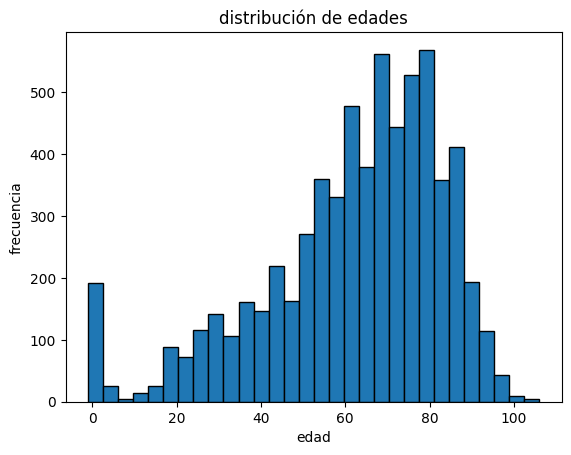

In [10]:
plt.hist(data['edad'], bins=30, edgecolor='black')
plt.xlabel('edad')
plt.ylabel('frecuencia')
plt.title('distribución de edades')
plt.show()

In [11]:
diagnostico_counts = data['DIAGNOSTICO'].value_counts().head(10)

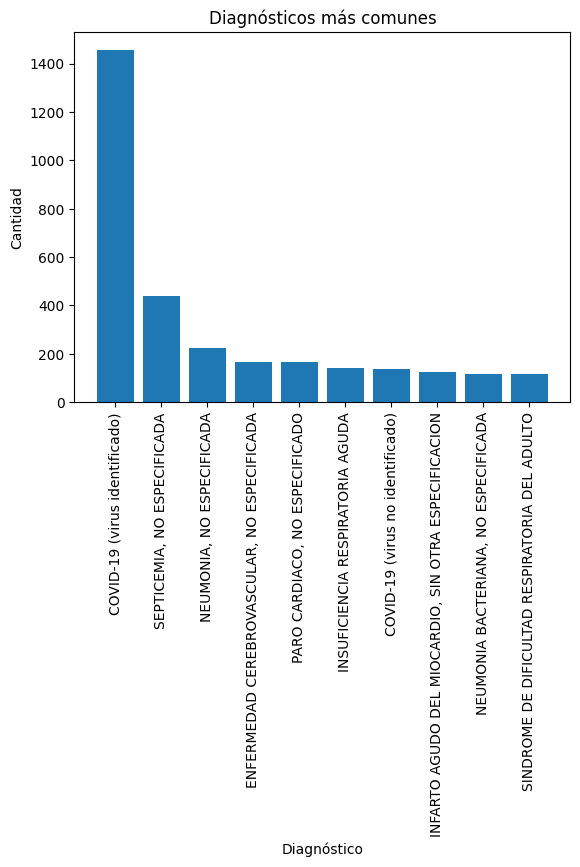

In [12]:
plt.bar(diagnostico_counts.index, diagnostico_counts.values)
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.title('Diagnósticos más comunes')
plt.xticks(rotation=90)
plt.show()

In [13]:
sexo_counts = data['SEXO'].value_counts()

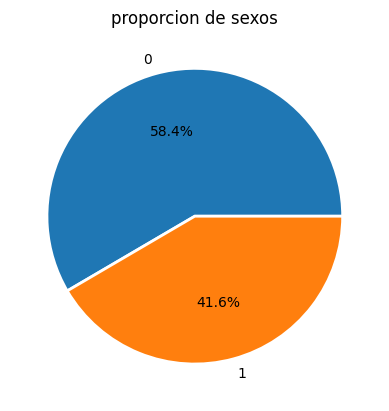

In [14]:
plt.pie(sexo_counts.values, labels=sexo_counts.index, autopct='%1.1f%%', wedgeprops={'linewidth':2, 'edgecolor':'white'})
plt.title('proporcion de sexos')
plt.show()

In [15]:
count_year = data['año'].value_counts().sort_index()

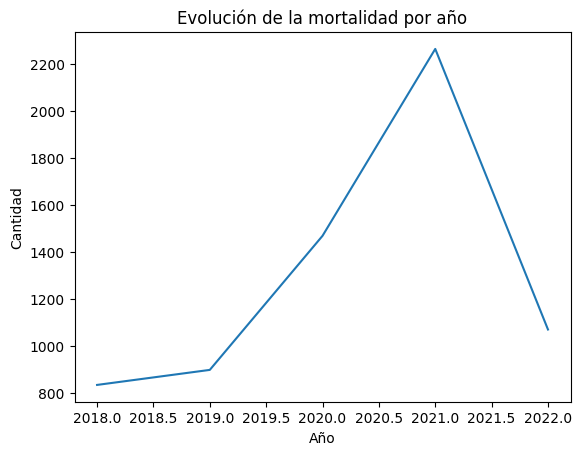

In [16]:
plt.plot(count_year.index, count_year.values)
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Evolución de la mortalidad por año')
plt.show()

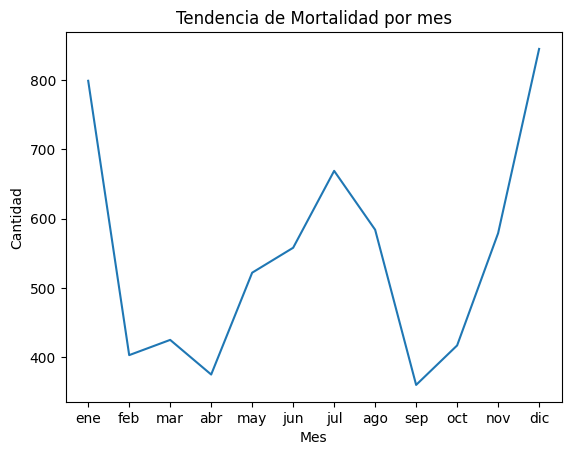

In [17]:
#Gráfico para mostrar la tendencia de mortalidad por mes

#convertimos la columna fecha a datetime
data['FECHA'] = pd.to_datetime(data['FECHA'])

#agrupamos los datos por mes y calcular el conteo de registros
count_for_month = data.groupby(data['FECHA'].dt.month)['FECHA'].count()

#gráfico de lineas
month = ['ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic']

plt.plot(month, count_for_month)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Tendencia de Mortalidad por mes')
plt.show()

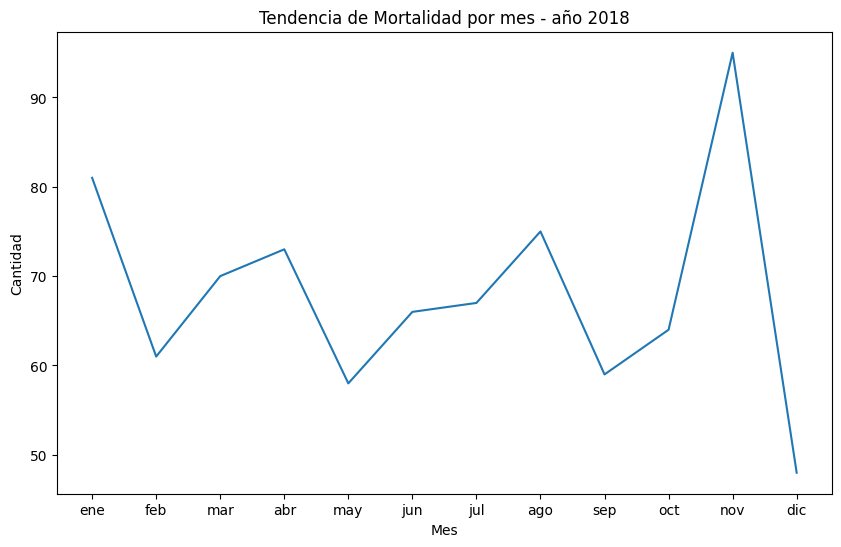

In [18]:
year = 2018

plt.figure(figsize=(10,6))


data_filtrada =  data[data['FECHA'].dt.year == year]
count_for_month = data_filtrada.groupby(data_filtrada['FECHA'].dt.month)['FECHA'].count()
meses = ['ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic']

plt.plot(meses, count_for_month)
    
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title(f'Tendencia de Mortalidad por mes - año {year}')
plt.show()




In [19]:
#Transformación de object a datetime
data['FECHA'] = pd.to_datetime(data['FECHA'])

In [20]:
#Función que gráfica la mortalidad de cada año dividida en meses.
def mortalidad_anio(anio):
    year = anio
    data_filtrada =  data[data['FECHA'].dt.year == year]

    conteo_por_mes_s = data_filtrada.groupby([data_filtrada['FECHA'].dt.month, 'SEXO'])['FECHA'].count()
    
    data_tendencia = conteo_por_mes_s.unstack(level='SEXO')
    
    meses = ['ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic']
    plt.plot(meses, data_tendencia[0], label='Hombres')
    plt.plot(meses, data_tendencia[1], label='Mujeres')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad')
    plt.title(f'Tendencia de Mortalidad por mes - año{year}')
    plt.legend()
    plt.show()

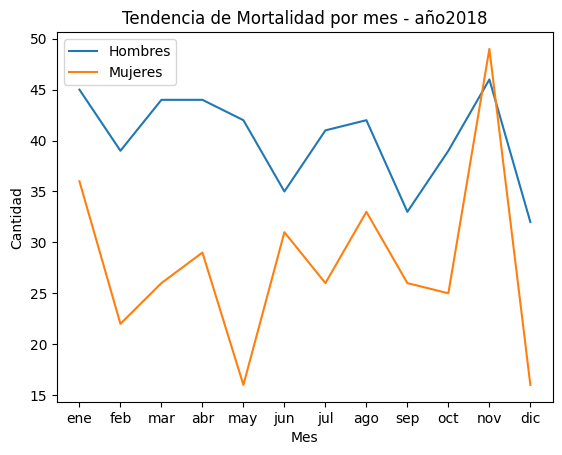

In [21]:
mortalidad_anio(2018)

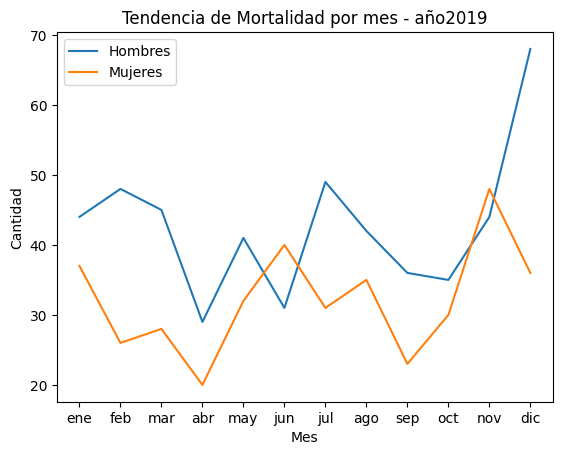

In [22]:
mortalidad_anio(2019)

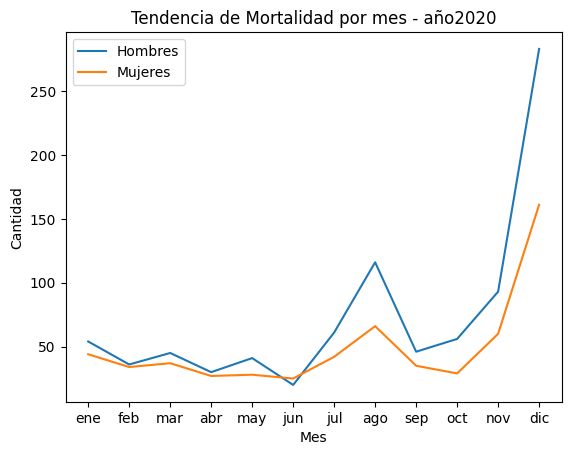

In [23]:
mortalidad_anio(2020)

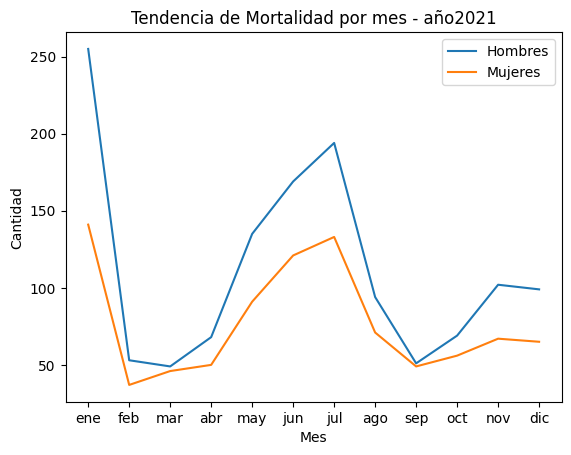

In [24]:
mortalidad_anio(2021)

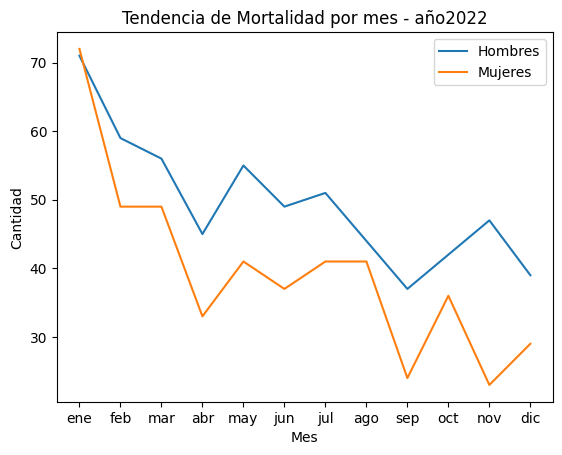

In [25]:
mortalidad_anio(2022)

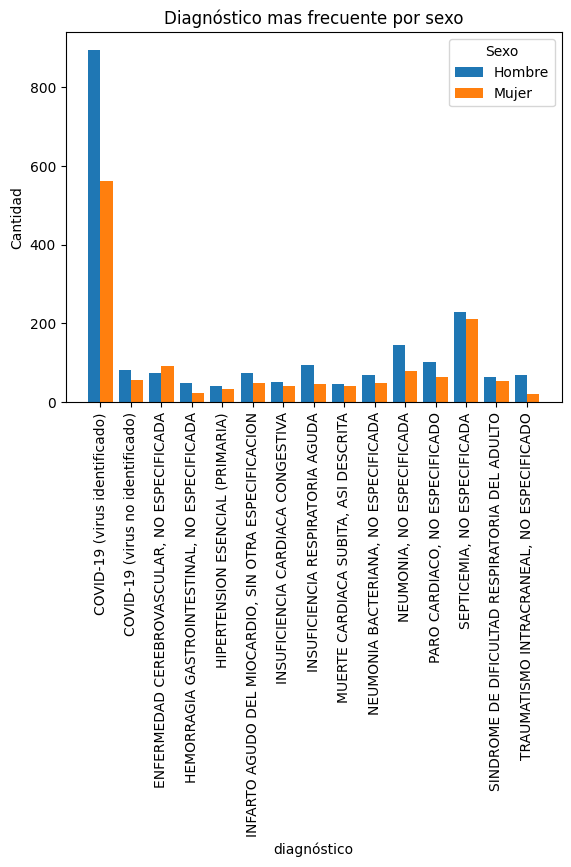

In [26]:
import numpy as np
diagnostico_counts_s = data['DIAGNOSTICO'].value_counts().head(15).index
data_filtrado_sexo = data[data['DIAGNOSTICO'].isin(diagnostico_counts_s)]
conteo_diagnostico_sexo = data_filtrado_sexo.groupby(['DIAGNOSTICO', 'SEXO']).size().unstack()

n = len(conteo_diagnostico_sexo)
width = 0.4
x = np.arange(n)

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, conteo_diagnostico_sexo[0], width, label='Hombre')
rects1 = ax.bar(x + width/2, conteo_diagnostico_sexo[1], width, label='Mujer')

ax.set_xlabel('diagnóstico')
ax.set_ylabel('Cantidad')
ax.set_title('Diagnóstico mas frecuente por sexo')
ax.set_xticks(x)
ax.set_xticklabels(conteo_diagnostico_sexo.index, rotation=90)
ax.legend(title='Sexo')
plt.show()

In [27]:
data['DIAGNOSTICO'].value_counts()

DIAGNOSTICO
COVID-19 (virus identificado)                                                    1456
SEPTICEMIA, NO ESPECIFICADA                                                       439
NEUMONIA, NO ESPECIFICADA                                                         224
ENFERMEDAD CEREBROVASCULAR, NO ESPECIFICADA                                       165
PARO CARDIACO, NO ESPECIFICADO                                                    165
                                                                                 ... 
TUMOR MALIGNO DEL CONDUCTO CRANEOFARINGEO                                           1
TUMOR MALIGNO DEL OMOPLATO Y DE LOS HUESOS LARGOS DEL MIEMBRO SUPERIOR              1
TUMOR MALIGNO DE LA PLEURA                                                          1
CALCULO DE CONDUCTO BILIAR CON COLECISTITIS                                         1
OTROS TRASTORNOS CEREBROVASCULARES EN ENFERMEDADES CLASIFICADAS EN OTRA PARTE       1
Name: count, Length: 807, dtype: int64

In [28]:
data['edad'].value_counts()

edad
67     165
71     164
80     153
70     144
73     143
      ... 
7        2
13       1
101      1
106      1
9        1
Name: count, Length: 105, dtype: int64

In [29]:
data['FECHA NACIO'] = pd.to_datetime(data['FECHA NACIO'])

In [30]:
data.dtypes

FECHA                                    datetime64[ns]
DIAGNOSTICO                                      object
FECHA NACIO                              datetime64[ns]
SEXO                                              int64
año                                               int64
SERVICIO_NEONATOLOGIA                              bool
SERVICIO_PEDIATRIA MEDICA                          bool
SERVICIO_RECUPERACION                              bool
SERVICIO_SALA DE PARTOS                            bool
SERVICIO_UCIN                                      bool
SERVICIO_UNIDAD DE CUIDADO INTERMEDIO              bool
SERVIVIO_PISO_5_12                                 bool
SERVICIO_URGENCIA ADULTO                           bool
SERVICIOS_URGENCIA PEDIATRIA                       bool
edad                                              int64
dtype: object

In [31]:
variables_incluidas = ['FECHA', 'FECHA NACIO', 'SEXO', 'año', 'SERVICIO_NEONATOLOGIA', 'SERVICIO_PEDIATRIA MEDICA',
                       'SERVICIO_RECUPERACION', 'SERVICIO_SALA DE PARTOS', 'SERVICIO_UCIN', 'SERVICIO_UNIDAD DE CUIDADO INTERMEDIO',
                       'SERVIVIO_PISO_5_12', 'SERVICIO_URGENCIA ADULTO', 'SERVICIOS_URGENCIA PEDIATRIA', 'edad', ]

data_filter = data[variables_incluidas]

correlation_matrix = data_filter.corr()

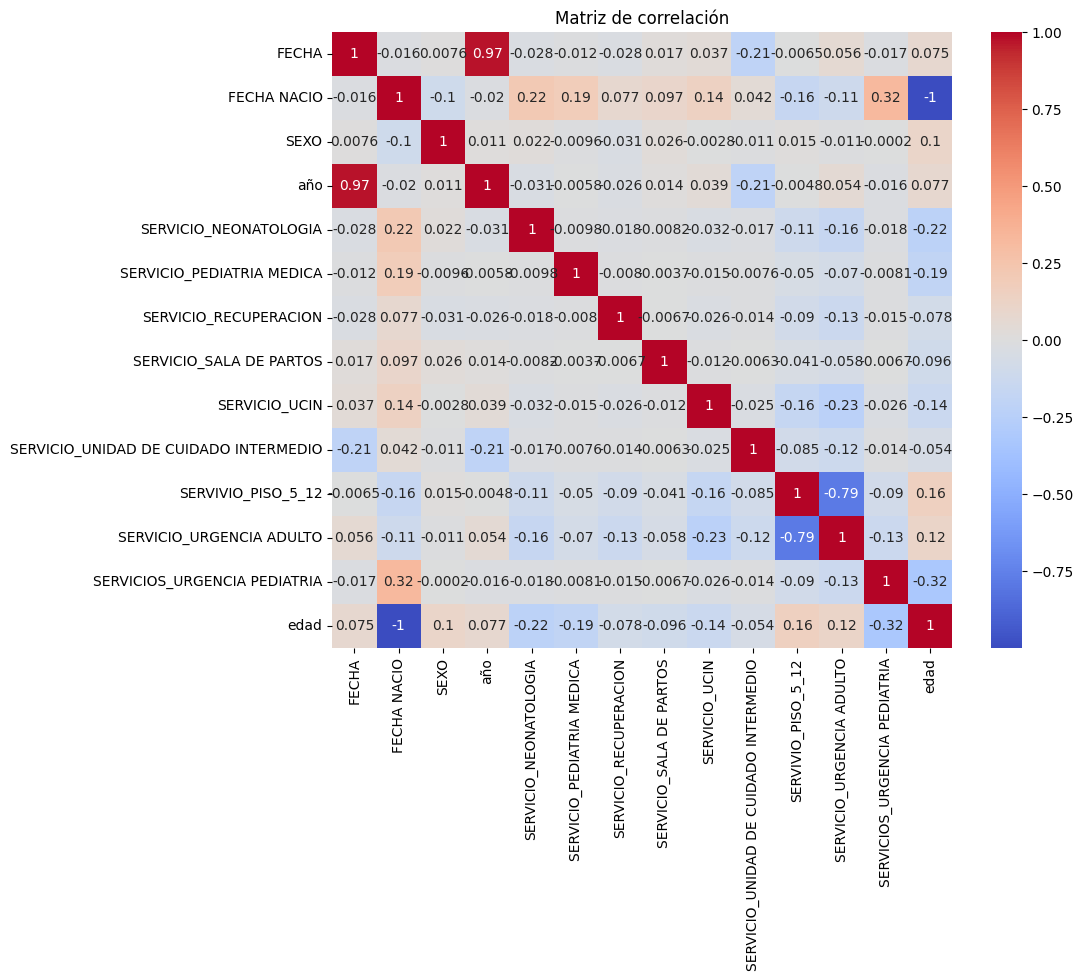

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

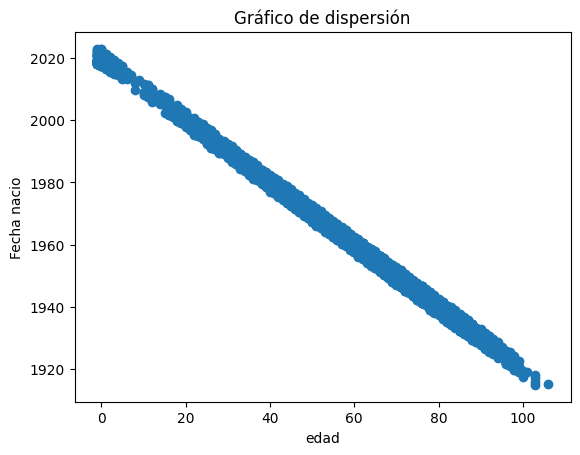

In [33]:
x = data['edad']
y =  data['FECHA NACIO']

plt.scatter(x,y)

plt.xlabel('edad')
plt.ylabel('Fecha nacio')
plt.title('Gráfico de dispersión')
plt.show()

# Procesamiento de texto

In [34]:
from nltk.tokenize import word_tokenize
diagnostico = data['DIAGNOSTICO']

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/dani94/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
#tokenizacion
diagnostico = diagnostico.apply(lambda x: word_tokenize(x))
diagnostico


0       [diarrea, gastroenteritis, presunto, origen, i...
1       [diarrea, gastroenteritis, presunto, origen, i...
2       [diarrea, gastroenteritis, presunto, origen, i...
3       [diarrea, gastroenteritis, presunto, origen, i...
4       [tuberculosis, pulmon, confirmada, hallazgo, m...
5       [tuberculosis, pulmon, confirmada, histologica...
6       [tuberculosis, pulmon, confirmada, medios, esp...
7       [tuberculosis, respiratoria, especificada, con...
8       [tuberculosis, respiratoria, especificada, men...
9                  [tuberculosis, organos, especificados]
10                         [septicemias, estreptococicas]
11           [septicemia, debida, staphylococcus, aureus]
12        [septicemia, debida, organismos, gramnegativos]
13                           [septicemias, especificadas]
14                           [septicemias, especificadas]
15                           [septicemias, especificadas]
16                           [septicemias, especificadas]
17            

In [46]:
#eliminar caracteres especiales utilizando expresiones regulares

caracteres_especiales = ['!', '@', '#', '$', '%', '^', '&', '*', '(',')', '{','}', '[',']', '<','>', '?','¿', '¡']

#diagnostic = diagnostic.apply(lambda x: ''.join([c for c in x if c not in caracteres_especiales]))

diagnostico = diagnostico.apply(lambda x: re.sub(r'[^\w\s]','', x))
diagnostico

0       diarrea gastroenteritis presunto origen infecc...
1       diarrea gastroenteritis presunto origen infecc...
2       diarrea gastroenteritis presunto origen infecc...
3       diarrea gastroenteritis presunto origen infecc...
4       tuberculosis pulmon confirmada hallazgo micros...
5         tuberculosis pulmon confirmada histologicamente
6       tuberculosis pulmon confirmada medios especifi...
7       tuberculosis respiratoria especificada confirm...
8       tuberculosis respiratoria especificada mencion...
9                      tuberculosis organos especificados
10                            septicemias estreptococicas
11                septicemia debida staphylococcus aureus
12             septicemia debida organismos gramnegativos
13                              septicemias especificadas
14                              septicemias especificadas
15                              septicemias especificadas
16                              septicemias especificadas
17            

In [47]:
#Convertir todo a minusculas
diagnostico = diagnostico.str.lower()
diagnostico

0       diarrea gastroenteritis presunto origen infecc...
1       diarrea gastroenteritis presunto origen infecc...
2       diarrea gastroenteritis presunto origen infecc...
3       diarrea gastroenteritis presunto origen infecc...
4       tuberculosis pulmon confirmada hallazgo micros...
5         tuberculosis pulmon confirmada histologicamente
6       tuberculosis pulmon confirmada medios especifi...
7       tuberculosis respiratoria especificada confirm...
8       tuberculosis respiratoria especificada mencion...
9                      tuberculosis organos especificados
10                            septicemias estreptococicas
11                septicemia debida staphylococcus aureus
12             septicemia debida organismos gramnegativos
13                              septicemias especificadas
14                              septicemias especificadas
15                              septicemias especificadas
16                              septicemias especificadas
17            

In [48]:
#eliminacion de palabras comunes
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))

diagnostico = diagnostico.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

diagnostico

[nltk_data] Downloading package stopwords to /home/dani94/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       diarrea gastroenteritis presunto origen infecc...
1       diarrea gastroenteritis presunto origen infecc...
2       diarrea gastroenteritis presunto origen infecc...
3       diarrea gastroenteritis presunto origen infecc...
4       tuberculosis pulmon confirmada hallazgo micros...
5         tuberculosis pulmon confirmada histologicamente
6       tuberculosis pulmon confirmada medios especifi...
7       tuberculosis respiratoria especificada confirm...
8       tuberculosis respiratoria especificada mencion...
9                      tuberculosis organos especificados
10                            septicemias estreptococicas
11                septicemia debida staphylococcus aureus
12             septicemia debida organismos gramnegativos
13                              septicemias especificadas
14                              septicemias especificadas
15                              septicemias especificadas
16                              septicemias especificadas
17            

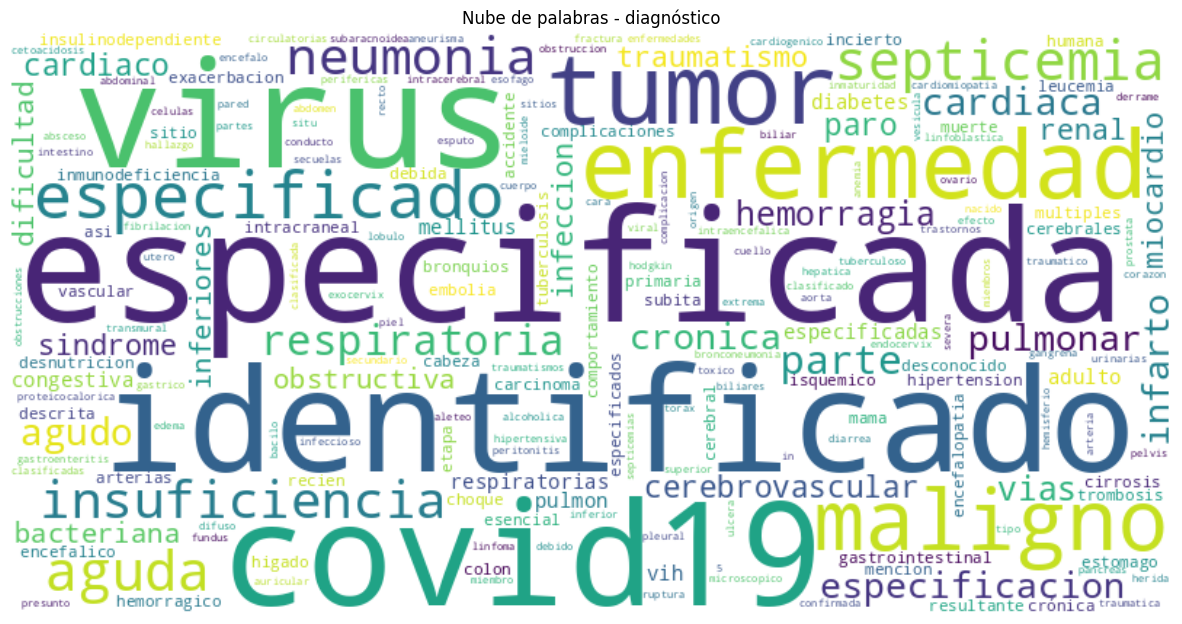

In [51]:
#Análisis de frecuencia de palabras
from nltk.probability import FreqDist
from wordcloud import WordCloud

#unir todos los token en una lista
all_tokens = [token for sublist in diagnostico for token in sublist]

#calcular la frecuencia de las palabras
frecuencia = FreqDist(all_tokens)

#Creamos el objeto wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia)

#Mostrar el gráfico de nubes de palabras
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - diagnóstico')
plt.show()

# Análisis de sentimiento

In [41]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('SentimentIntensityAnalyzer')
nltk.download('vader_lexicon')

[nltk_data] Error loading SentimentIntensityAnalyzer: Package
[nltk_data]     'SentimentIntensityAnalyzer' not found in index
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dani94/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
#iniciar el analizador de sentimiento
diagnostic = data['DIAGNOSTICO']
sia = SentimentIntensityAnalyzer()

#realizar el análisis de sentimiento
sentimientos = diagnostic.apply(lambda x: sia.polarity_scores(x))

#obtener el puntaje de sentimiento para cada diagnóstico
puntajes = sentimientos.apply(lambda x: x['compound'])

#mostrar los diagnósticos y sus puntajes de sentimiento
for i, diag in enumerate(diagnostico):
    print(f'Diagnostico: {diag}')
    print(f"Puntaje de sentimiento: {puntajes[i]}")
    print("--------")

Diagnostico: diarrea gastroenteritis presunto origen infeccioso
Puntaje de sentimiento: 0.0
--------
Diagnostico: diarrea gastroenteritis presunto origen infeccioso
Puntaje de sentimiento: 0.0
--------
Diagnostico: diarrea gastroenteritis presunto origen infeccioso
Puntaje de sentimiento: 0.0
--------
Diagnostico: diarrea gastroenteritis presunto origen infeccioso
Puntaje de sentimiento: 0.0
--------
Diagnostico: tuberculosis pulmon confirmada hallazgo microscopico bacilo tuberculoso esputo
Puntaje de sentimiento: 0.0
--------
Diagnostico: tuberculosis pulmon confirmada histologicamente
Puntaje de sentimiento: 0.0
--------
Diagnostico: tuberculosis pulmon confirmada medios especificados
Puntaje de sentimiento: -0.296
--------
Diagnostico: tuberculosis respiratoria especificada confirmada bacteriologicamente histologicamente
Puntaje de sentimiento: -0.296
--------
Diagnostico: tuberculosis respiratoria especificada mencion confirmacion bacteriologica histologica
Puntaje de sentimiento: 

In [43]:
#Agrupación de diagnósticos y contar la cantidad de ocurrencias
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

agrupacion = data.groupby('DIAGNOSTICO').size().reset_index(name='count')
agrupacion_ordenada = agrupacion.sort_values('count', ascending=False)
agrupacion_ordenada

DIAGNOSTICO  count
111                      COVID-19 (virus identificado)   1456
604                        SEPTICEMIA, NO ESPECIFICADA    439
490                          NEUMONIA, NO ESPECIFICADA    224
564                     PARO CARDIACO, NO ESPECIFICADO    165
211        ENFERMEDAD CEREBROVASCULAR, NO ESPECIFICADA    165
415                   INSUFICIENCIA RESPIRATORIA AGUDA    140
112                   COVID-19 (virus no identificado)    137
383  INFARTO AGUDO DEL MIOCARDIO, SIN OTRA ESPECIFI...    123
478               NEUMONIA BACTERIANA, NO ESPECIFICADA    118
609     SINDROME DE DIFICULTAD RESPIRATORIA DEL ADULTO    117
406                  INSUFICIENCIA CARDIACA CONGESTIVA     93
640          TRAUMATISMO INTRACRANEAL, NO ESPECIFICADO     90
471               MUERTE CARDIACA SUBITA, ASI DESCRITA     86
374                   HIPERTENSION ESENCIAL (PRIMARIA)     72
318       HEMORRAGIA GASTROINTESTINAL, NO ESPECIFICADA     71
395  INFECCION AGUDA NO ESPECIFICADA DE LAS VIAS RE...     67
247  ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...     62
244  ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...     54
9    ACCIDENTE VASCULAR ENCEFALICO AGUDO, NO ESPECI...     53
248  ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON IN...     51
413        INSUFICIENCIA RENAL CRONICA NO ESPECIFICADA     48
201                      ENCEFALOPATIA NO ESPECIFICADA     40
711    TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA     39
727  TUMOR MALIGNO DE LOS BRONQUIOS O DEL PULMON, P...     39
252                 ENFERMEDAD RENAL CRÓNICA - ETAPA 5     39
758  TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA     37
129  DESNUTRICION PROTEICOCALORICA SEVERA, NO ESPEC...     34
412         INSUFICIENCIA RENAL AGUDA, NO ESPECIFICADA     30
398  INFECCION DE VIAS URINARIAS, SITIO NO ESPECIFI...     30
418        INSUFICIENCIA RESPIRATORIA, NO ESPECIFICADA     28
489                    NEUMONIA VIRAL, NO ESPECIFICADA     28
427                       LEUCEMIA LINFOBLASTICA AGUDA     27
387  INFARTO CEREBRAL DEBIDO A TROMBOSIS DE ARTERIA...     27
249  ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA, NO ES...     27
95                        CIRROSIS HEPATICA ALCOHOLICA     27
153  DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...     23
509    OTRAS CIRROSIS DEL HIGADO Y LA NO ESPECIFICADAS     23
721                       TUMOR MALIGNO DE LA PROSTATA     22
629                        TRAUMATISMO CEREBRAL DIFUSO     22
749              TUMOR MALIGNO DEL CUERPO DEL ESTOMAGO     21
695                         TUMOR MALIGNO DE EXOCERVIX     21
89                                 CHOQUE CARDIOGENICO     20
407            INSUFICIENCIA CARDIACA, NO ESPECIFICADA     20
661  TUBERCULOSIS DEL PULMON, CONFIRMADA POR HALLAZ...     20
402                                INMATURIDAD EXTREMA     19
123       DERRAME PLEURAL NO CLASIFICADO EN OTRA PARTE     18
279                     FIBRILACION Y ALETEO AURICULAR     17
134  DIABETES MELLITUS INSULINODEPENDIENTE CON COMP...     17
88                            CHOQUE , NO ESPECIFICADO     17
133  DIABETES MELLITUS INSULINODEPENDIENTE CON COMP...     17
743     TUMOR MALIGNO DEL COLON, PARTE NO ESPECIFICADA     16
50                     BRONCONEUMONIA, NO ESPECIFICADA     16
760                  TUMOR MALIGNO DEL FUNDUS GASTRICO     16
778                            TUMOR MALIGNO DEL RECTO     16
762          TUMOR MALIGNO DEL HIGADO, NO ESPECIFICADO     15
631          TRAUMATISMO DE LA CABEZA, NO ESPECIFICADO     15
537                    OTRAS SEPTICEMIAS ESPECIFICADAS     15
19                      ANEMIA DE TIPO NO ESPECIFICADO     15
530                  OTRAS OBSTRUCCIONES DEL INTESTINO     14
191  EMBOLIA PULMONAR SIN MENCION DE CORAZON PULMON...     14
335                     HEMORRAGIA SUBDURAL TRAUMATICA     13
430                            LEUCEMIA MIELOIDE AGUDA     13
205  ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIE...     13
771                           TUMOR MALIGNO DEL OVARIO     13
700          

/home/dani94/Data_mortalidad/mortalidad-hospital-erasmo/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


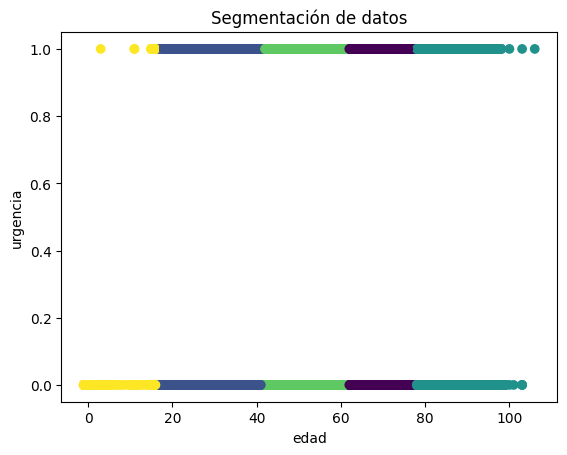

In [44]:
#agrupacion
from sklearn.cluster import KMeans

caracteristicas = data[['edad', 'SERVICIO_URGENCIA ADULTO']]

#Realizamos la segmentacion utilizando kmeans
kmeans = KMeans(n_clusters=5) #número de grupos deseados
kmeans.fit(caracteristicas)

etiquetas = kmeans.labels_

data['grupo'] = etiquetas

#creamos el gráfico
plt.scatter(data['edad'], data['SERVICIO_URGENCIA ADULTO'], c=data['grupo'], cmap='viridis')
plt.xlabel('edad')
plt.ylabel('urgencia')
plt.title('Segmentación de datos')
plt.show()